In [1]:
import pandas as pd           # For data handling
import matplotlib.pyplot as plt  # For static plots
import seaborn as sns         # For statistical visualizations
import plotly.express as px   # For interactive plots
import geopandas as gpd


In [2]:
#Task 1
try:
    df = pd.read_csv("cloud_workload_dataset.csv")
    print("Dataset loaded successfully.")
except Exception as e:
    print("Error loading dataset:", e)

Dataset loaded successfully.


In [3]:
#Task 2
#Calling the df to display a preview of the table
df.head()


,Job_ID,Task_Start_Time,Task_End_Time,CPU_Utilization (%),Memory_Consumption (MB),Task_Execution_Time (ms),System_Throughput (tasks/sec),Task_Waiting_Time (ms),Data_Source,Number_of_Active_Users,Network_Bandwidth_Utilization (Mbps),Job_Priority,Scheduler_Type,Resource_Allocation_Type,Error_Rate (%)
0,JOB_1,2024-01-01 00:00:00,2024-01-01 00:00:00,39.96,3622,2734,9.03,83,IoT,3000,112.97,Low,FCFS,Static,1.65
1,JOB_2,2024-01-01 00:01:00,2024-01-01 00:01:00,86.06,5690,2868,8.03,64,Social Media,4590,329.20,Low,Priority-Based,Dynamic,2.92
2,JOB_3,2024-01-01 00:02:00,2024-01-01 00:02:00,68.56,5075,1311,5.69,971,Cloud,3780,542.82,Low,Priority-Based,Static,2.60
3,JOB_4,2024-01-01 00:03:00,2024-01-01 00:03:00,57.89,7686,875,4.51,757,Social Media,4474,973.94,Medium,Priority-Based,Dynamic,1.33
4,JOB_5,2024-01-01 00:04:00,2024-01-01 00:04:00,22.48,2297,1260,6.38,581,Enterprise DB,1981,405.38,Low,FCFS,Static,1.99


In [4]:
#Check for missing values
df.isnull().sum()

Job_ID                                  0
Task_Start_Time                         0
Task_End_Time                           0
CPU_Utilization (%)                     0
Memory_Consumption (MB)                 0
Task_Execution_Time (ms)                0
System_Throughput (tasks/sec)           0
Task_Waiting_Time (ms)                  0
Data_Source                             0
Number_of_Active_Users                  0
Network_Bandwidth_Utilization (Mbps)    0
Job_Priority                            0
Scheduler_Type                          0
Resource_Allocation_Type                0
Error_Rate (%)                          0
dtype: int64

In [5]:
#Showcase median, mean, standard deviation etc.
df.describe()


,CPU_Utilization (%),Memory_Consumption (MB),Task_Execution_Time (ms),System_Throughput (tasks/sec),Task_Waiting_Time (ms),Number_of_Active_Users,Network_Bandwidth_Utilization (Mbps),Error_Rate (%)
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,49.746602,4218.142800,2509.336800,5.271740,507.632400,2565.994200,499.520224,2.521932
std,23.170651,2142.393544,1415.060641,2.713111,287.408833,1431.848731,283.969648,1.453217
min,10.000000,502.000000,102.000000,0.500000,10.000000,50.000000,10.070000,0.000000
25%,29.510000,2339.000000,1286.750000,2.940000,263.000000,1327.000000,252.487500,1.260000
50%,50.000000,4235.500000,2484.500000,5.290000,506.000000,2614.000000,501.600000,2.520000
75%,69.850000,6039.000000,3731.000000,7.560000,757.000000,3794.250000,744.025000,3.800000
max,89.980000,7998.000000,4999.000000,10.000000,999.000000,4998.000000,999.730000,5.000000


In [17]:
#isolate the date from datetime
df['Task_Start_Time'] = pd.to_datetime(df['Task_Start_Time'])
df['date_only'] = df['Task_Start_Time'].dt.date
#print(df['date_only'])
#Group the data
Memory_Consumption_per_time = df.groupby(df['date_only']).size().reset_index(name='Memory_Consumption')
print(Memory_Consumption_per_time)

    date_only  Memory_Consumption
0  2024-01-01                1440
1  2024-01-02                1440
2  2024-01-03                1440
3  2024-01-04                 680


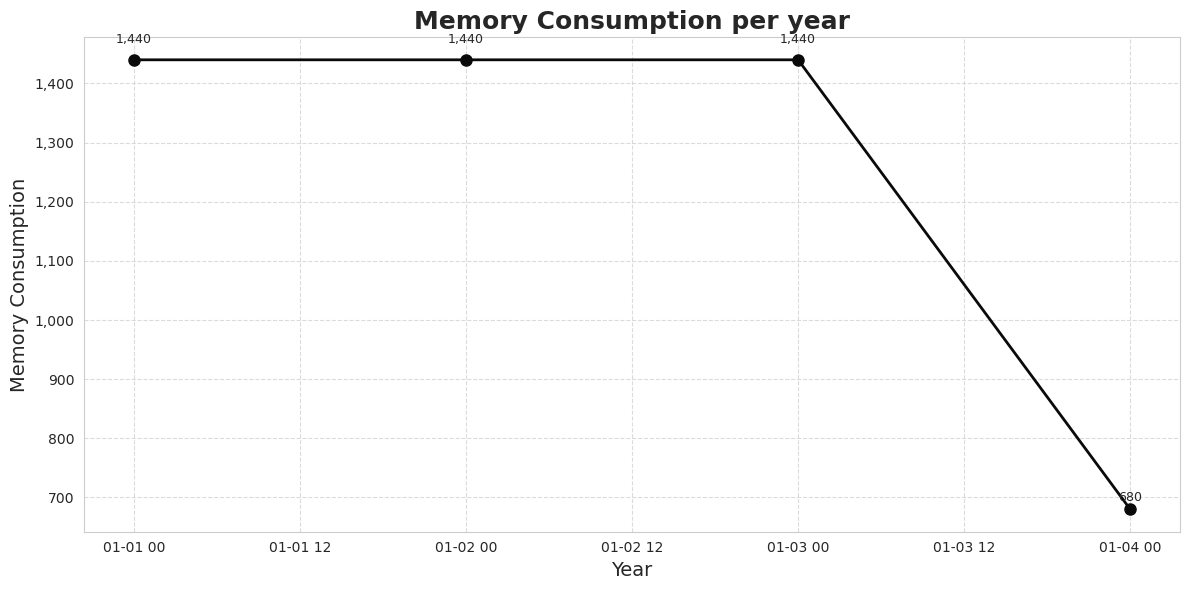

In [34]:
#Task3
# Creating the line chart

# Set the style for better visualization
sns.set_style("whitegrid")

# Create the line chart
plt.figure(figsize=(12, 6))
plt.plot(Memory_Consumption_per_time['date_only'], Memory_Consumption_per_time['Memory_Consumption'], marker='o', linestyle='-', linewidth=2, color='#0a0a0a', markersize=8)

# Customize the plot
plt.title('Memory Consumption per year', fontsize=18, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Memory Consumption', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

# Add data labels for each point
for x, y in zip(Memory_Consumption_per_time['date_only'],  Memory_Consumption_per_time['Memory_Consumption']):
    plt.text(x, y + (y * 0.02), f'{y:,}', ha='center', fontsize=9)

# Format y-axis with comma separators for thousands
plt.gca().get_yaxis().set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))

# Adjust layout and show plot
plt.tight_layout()
plt.show()

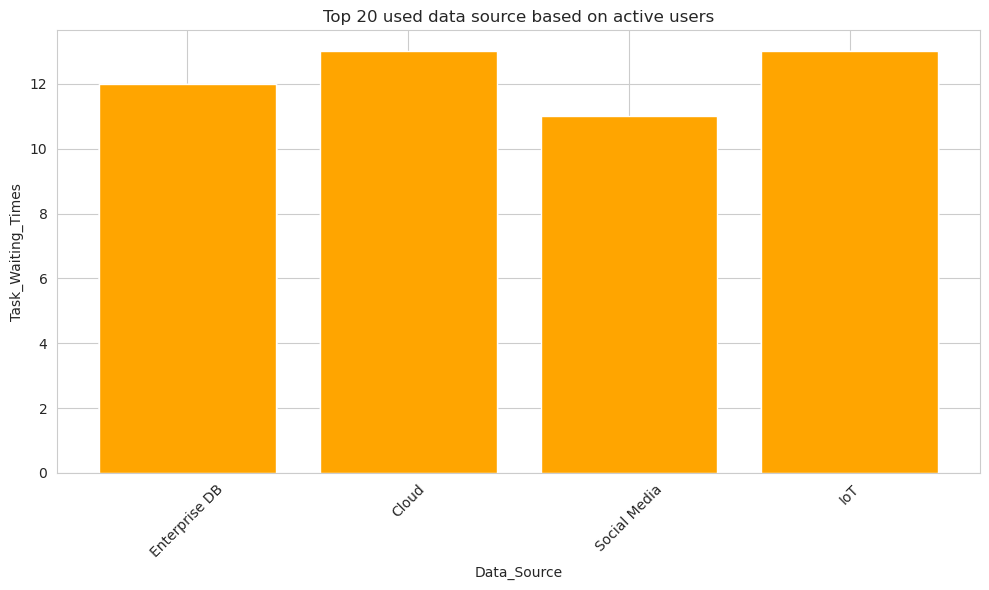

In [51]:
# Create a simple bar chart
# Sort by number of active users in descending order and select top 15
top15 = df.sort_values(by='Task_Waiting_Time (ms)', ascending=True).head(15)

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(top15['Data_Source'], top15['Task_Waiting_Time (ms)'], color='orange')
plt.xlabel('Data_Source')
plt.ylabel('Task_Waiting_Times')
plt.title('Top 20 used data source based on active users')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

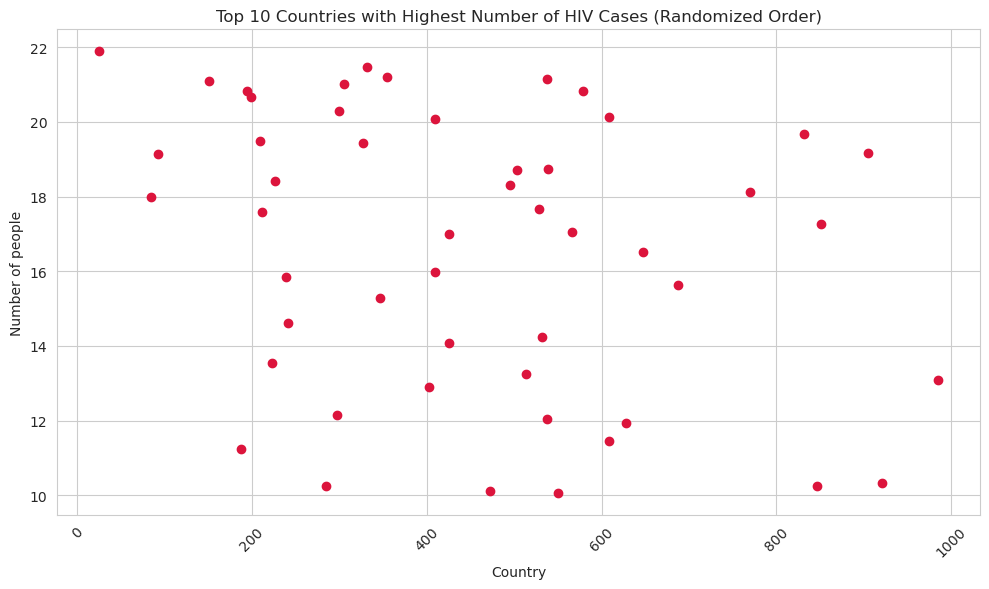

In [63]:
#Scatter graph
# Sort by HIV cases in descending order and select top 10
top50 = df.sort_values(by='Network_Bandwidth_Utilization (Mbps)').head(50)

# Randomize the order of the top 10
top50_random = top50.sample(frac=1, random_state=10).reset_index(drop=True)

# Create the bar plot for the randomized order
plt.figure(figsize=(10, 6))
plt.scatter(top50_random['Task_Waiting_Time (ms)'], top50_random['Network_Bandwidth_Utilization (Mbps)'], color='crimson')
plt.xlabel('Task Waiting Time (ms)')
plt.ylabel('Network Bandwidth Utilization')
plt.title('Bandwidth utilisation based on task waiting time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

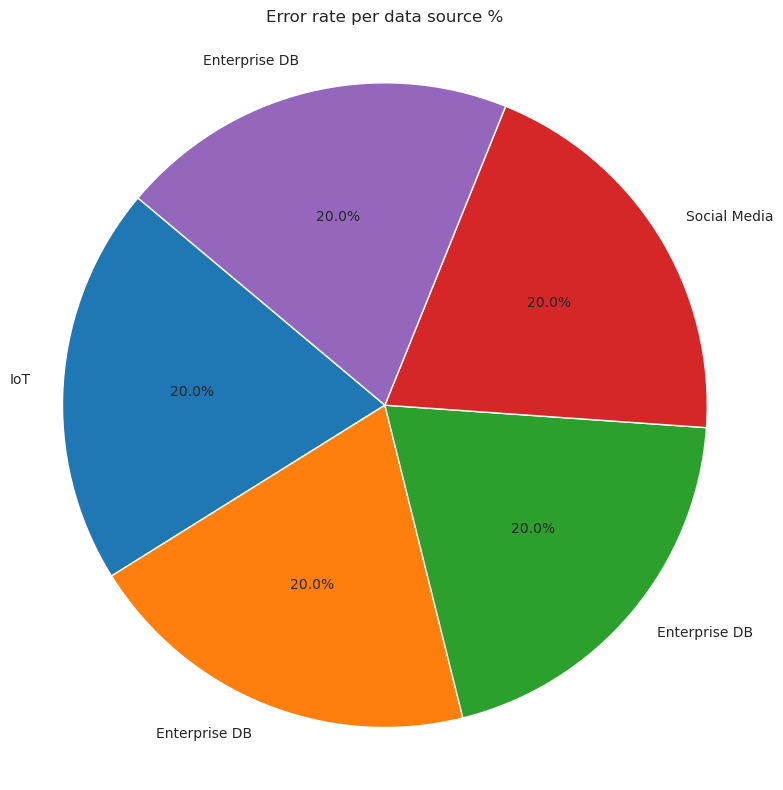

In [56]:
#Create a pie chart
# Sort by Adult prevalence of HIV/AIDS in descending order and select top 20
top5 = df.sort_values(by='Error_Rate (%)', ascending=False).head(5)

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(top5['Error_Rate (%)'], labels=top5['Data_Source'], autopct='%1.1f%%', startangle=140)
plt.title('Error rate per data source %')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
plt.tight_layout()
plt.show()